# <font color=blue> SQL Portfolio

# <font color=blue> #Technical explanation

<h2><font color=blue>Tools</h2>
<h3>** SQL **</h3>
SQL is a standard language for storing, manipulating and retrieving data in databases.
<h3>** MySQL **</h3>
MySQL is an open-source relational database management system.<br>
https://www.mysql.com/
<h3>** MySQL Workbench **</h3>
MySQL Workbench is a visual database design tool that integrates SQL development, administration, database design, creation and maintenance into single integrated development environment for the MySQL database system.<br>
https://www.mysql.com/products/workbench/

<h2><font color=blue>Data</h2>

<h3>**Raw Data**</h3>

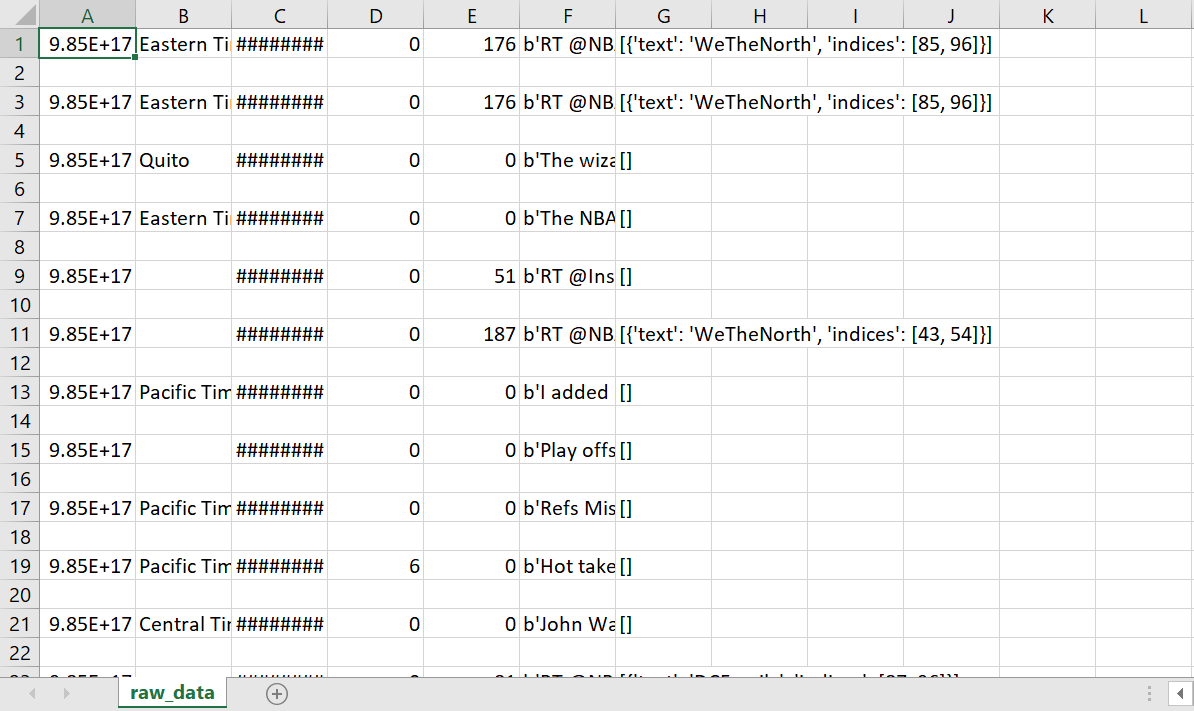
<h4>We collect our raw data from kaggle, twitter, facebook, and Google+. Here is a sample raw data from twitter post.</h4>
<br>

<h3>**Audit Data**</h3>

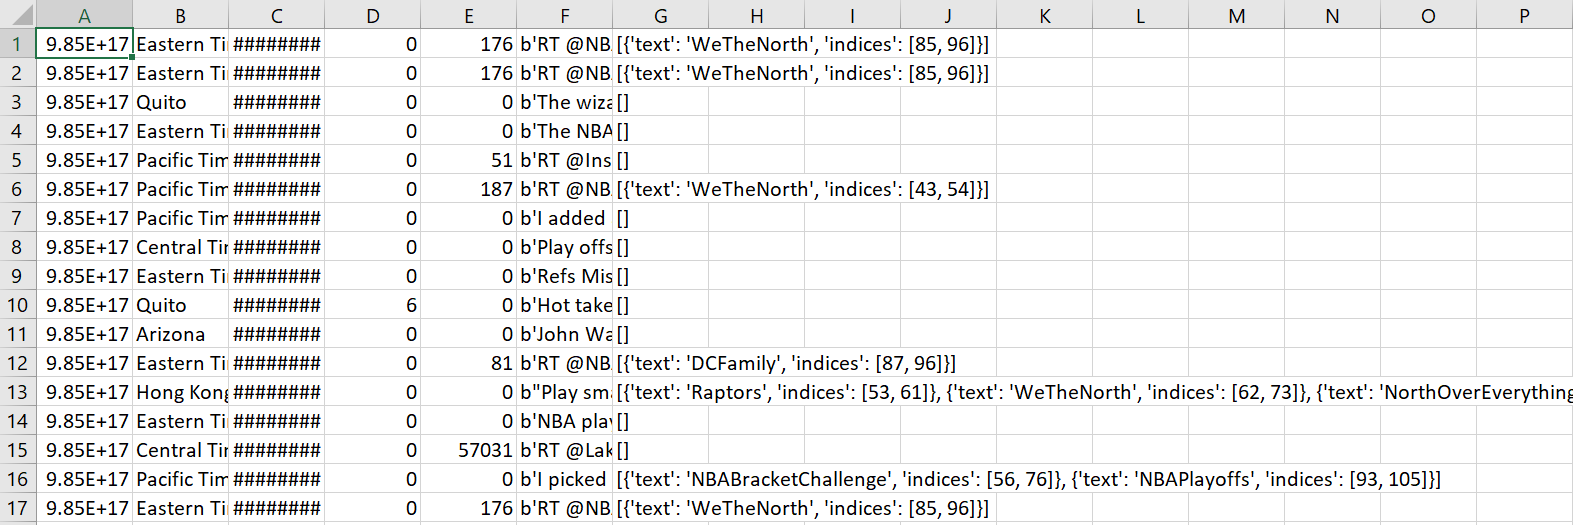
<h4>We Use functions, like "dropna(), drop_duplicates(), from "pandas" package in python to audit data and then export the data as csv file. Here is the sample audit data of twitter post.</h4>
<br>

<h3>**Import Data**</h3>

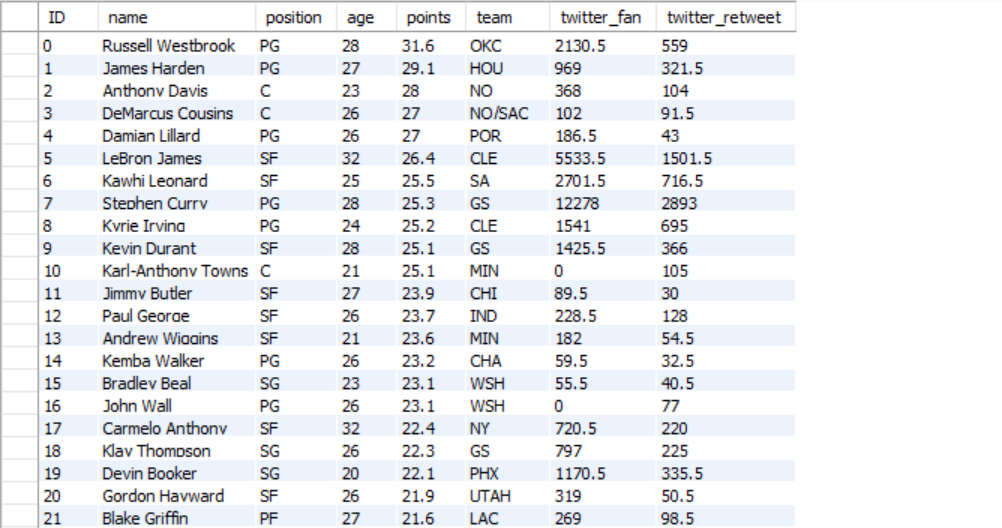
<h4>We import data into MySQL workbench and here is our data of twitter post in MySQL workbench.</h4>
<br>

# <font color=blue> #Design explanation

<h2>**MySQL database**</h2>
In our SQL database, we have tables for each of the entities concerning the NBA domain. Every table contains basic information about instances of one particular entity. For example, entity player would have team, height, age, collage as columns. 
As for social medias data, one table holds all the tweets collected form the social medias, along with user id, screen name, creating time of the tweet, count of like, count of retweet, etc. The tags related to the posts and the persons, places, or things are stored in another table. 
We use primary keys to identify which tags belong to which post. That way we could join tables together and find out which are the most popular tags and which tags are related to a particular person, place or thing.

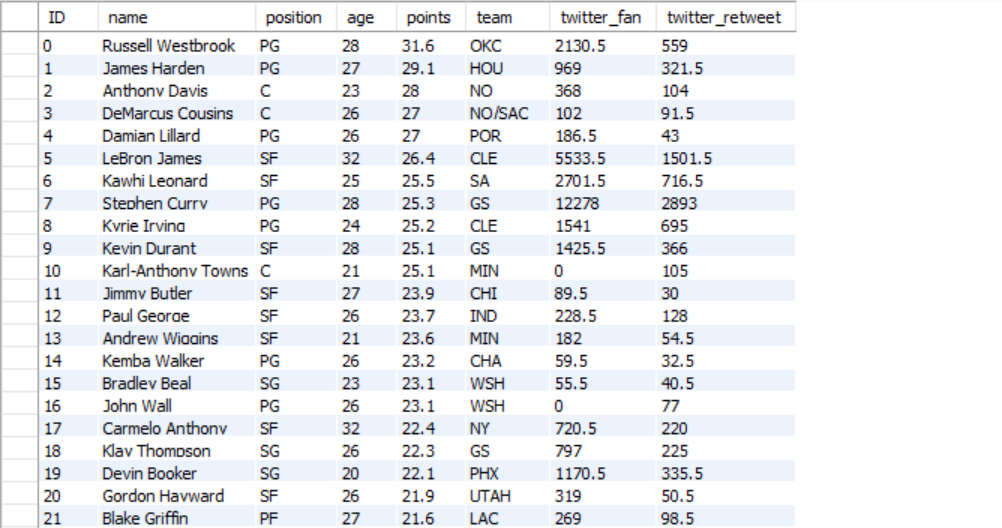
<br>
The pictures above can describe our database structure in MySQL. It is the for a relational database to consists of two or more tables with columns and rows. Each row represents an entry, and each column sorts a very specific type of information, like a name, address, and phone number. The relationship between tables and field types is called a schema. In a relational database, the schema must be clearly defined before any information can be added. This way data could maintain ACID(Atomicity, Consistency, Integrity, Durability), but there could be a trade off for convenience and speed.

# <font color=blue>#Code and data

<h2>Collect Data</h2>
We use tweepy to collect twitter posts, user id, time when the post was created, time zone of the user, count of retweet, count of like, and the hashtags included in the post text. Then save the data into csv file.
<br>
https://github.com/tweepy/tweepy

In [5]:
import pymysql
import tweepy
import json
from dateutil import parser
import pandas as pd
import re
import pymysql
import sqlalchemy
import numpy as np  
import twitter 
from pandas.io import sql
import csv
import json
import pandas as pd
import sys, getopt, pprint
from pymongo import MongoClient

<h2>Set the keys and tokens for connecting to Tweepy</h2>
<h3>Go to http://dev.twitter.com/apps/new to create an app and get values.</h3>

In [6]:
consumer_key= 'uzHA74JKJ3woXVnXZBBMjt3PN'
consumer_secret= 'kTuWm8ltScWibokVSeLmAat5RZuti4mSyQF8g4IVrb95Xz8lFh'
access_token= '4924562533-UIsWAAvLF8svY2RmDEpZKAlPGwq79p4kg2UeExc'
access_token_secret= 'MNLUH1cQaiPDXprTJYJD4yNcGLdXh9FKvJ2QeLCd4KLgc'

In [7]:
try:
    #connecting to tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)

    #If the file doesn’t exist, create it; if the file already exist, then replace it with the new file created
    csvFile = open('raw_data.csv', 'a')
    #Use csv Writer
    csvWriter = csv.writer(csvFile)

    #use the for function to collecte the data and write it into csv file line by line
    for tweet in tweepy.Cursor(api.search,
                               q="NBA",
                               #count=5000,
  
                               since="2018-04-11",
                               until="2018-04-15",
                               lang="en").items(2000):
        print (tweet.id, tweet.user.time_zone,tweet.created_at, tweet.text,tweet.retweet_count,tweet.favorite_count, tweet.entities.get('hashtags'))
        csvWriter.writerow([tweet.id, tweet.user.time_zone, tweet.created_at,tweet.favorite_count,tweet.retweet_count,tweet.text.encode('utf-8'), tweet.entities.get('hashtags')])
        #csvFile.close()

except tweepy.error.TweepError:
          raise

985306706400788480 Eastern Time (US & Canada) 2018-04-14 23:59:59 RT @NBA: Pump fake, side step, let it fly! 👍👍👍

10 PTS for Delon Wright in the 4th.

#WeTheNorth @ESPNNBA https://t.co/Z467MeAHf7 177 0 [{'text': 'WeTheNorth', 'indices': [85, 96]}]
985306706325286912 Eastern Time (US & Canada) 2018-04-14 23:59:59 RT @NBA: Pump fake, side step, let it fly! 👍👍👍

10 PTS for Delon Wright in the 4th.

#WeTheNorth @ESPNNBA https://t.co/Z467MeAHf7 177 0 [{'text': 'WeTheNorth', 'indices': [85, 96]}]
985306705604108289 Quito 2018-04-14 23:59:59 The wizards will be better off putting the ball in Bradley Beal’s hand for  entire 4th quarters. When it comes to d… https://t.co/kWwLlZaejK 0 0 []
985306703372738560 Eastern Time (US & Canada) 2018-04-14 23:59:58 The NBA need new refs pronto cause this shit getting op now 0 0 []
985306700231176192 None 2018-04-14 23:59:58 RT @Insider6ix: This is why NBA officiating needs to be reviewed, bad call. https://t.co/AIg8nXosJn 51 0 []
985306698746232832 None 20

985306644354609152 Eastern Time (US & Canada) 2018-04-14 23:59:44 YOUR DAMN REFS ARE TERRIBLE IN THIS WIZ/RAPTORS GAME @NBA 1 1 []
985306643750469632 None 2018-04-14 23:59:44 RT @HoopReview: Speaking to several nba scouts @nikehoopsummit this week... General consensus is this 2018 class is soft and needs to learn… 208 0 []
985306641435365376 Central Time (US & Canada) 2018-04-14 23:59:44 RT @NBA: Pump fake, side step, let it fly! 👍👍👍

10 PTS for Delon Wright in the 4th.

#WeTheNorth @ESPNNBA https://t.co/Z467MeAHf7 177 0 [{'text': 'WeTheNorth', 'indices': [85, 96]}]
985306639086641152 None 2018-04-14 23:59:43 nba youngboy x nicki minaj😩 just wow. 9 15 []
985306638730047494 Quito 2018-04-14 23:59:43 No one gets fouled without it being called in the entire NBA more than John Wall. Bullshit. 0 1 []
985306635244572672 None 2018-04-14 23:59:42 RT @NBA: Ahead of today's @Sixers #NBAPlayoffs opener... we showcase @BenSimmons25's best dimes! 

🏀: #PhilaUnite x #WhiteHot
⏰: 8pm/et 
📺:… 963 0 [{

985306584023748609 None 2018-04-14 23:59:30 Nba officials are trying John Wall with the no foul call 😤 0 0 []
985306582073401345 Central Time (US & Canada) 2018-04-14 23:59:29 RT @KevinOConnorNBA: How's your day, @SheaSerrano? https://t.co/NK781iX86z https://t.co/dZknWrEJXW 57 0 []
985306581846773760 None 2018-04-14 23:59:29 RT @NBA: Ahead of today's @Sixers #NBAPlayoffs opener... we showcase @BenSimmons25's best dimes! 

🏀: #PhilaUnite x #WhiteHot
⏰: 8pm/et 
📺:… 963 0 [{'text': 'NBAPlayoffs', 'indices': [34, 46]}, {'text': 'PhilaUnite', 'indices': [102, 113]}, {'text': 'WhiteHot', 'indices': [116, 125]}]
985306580949262336 Pacific Time (US & Canada) 2018-04-14 23:59:29 RT @NBA: #NBAKicks for #NBAPlayoffs for John Wall! https://t.co/UTh37Ctl6o 1135 0 [{'text': 'NBAKicks', 'indices': [9, 18]}, {'text': 'NBAPlayoffs', 'indices': [23, 35]}]
985306577870696448 None 2018-04-14 23:59:28 https://t.co/qeiEgE9Xec Any good spots to catch the NBA Playoffs in the Domain? #ATX 0 0 [{'text': 'ATX', 

985306504487153665 None 2018-04-14 23:59:11 RT Covers "Some #HereTheyCome notes heading into the #NBA Playoffs:

🏀 +2000 to win the title
🏀 Have won 16 straigh… https://t.co/EPoBG6AyK3 0 0 [{'text': 'HereTheyCome', 'indices': [16, 29]}, {'text': 'NBA', 'indices': [53, 57]}]
985306503929389056 Eastern Time (US & Canada) 2018-04-14 23:59:11 RT @NBA: "Everything right now!"

Jonas Valanciunas is mic'd up for the @Raptors on @ESPNNBA! #WeTheNorth https://t.co/x3O0uIuwk3 185 0 [{'text': 'WeTheNorth', 'indices': [94, 105]}]
985306503476199424 None 2018-04-14 23:59:11 RT @MARoxas: Hi NBA and basketball fans! Playoffs are finally here! Here are my picks for the first round. Good luck to all. 56 0 []
985306503472078848 Mountain Time (US & Canada) 2018-04-14 23:59:11 NBA playoffs 2018: Saturday schedule, bracket, tip times, TV channel info for every - https://t.co/FiwiT1kyRN 0 0 []
985306503128211457 None 2018-04-14 23:59:11 RT @NBA: Pump fake, side step, let it fly! 👍👍👍

10 PTS for Delon Wright

985306405333798912 London 2018-04-14 23:58:47 RT @NBA: Kevin Durant paces the @warriors #NBAPlayoffs win at home with 24 PTS, 8 REB, 7 AST! #DubNation https://t.co/hhSgiVbUhl 226 0 [{'text': 'NBAPlayoffs', 'indices': [42, 54]}, {'text': 'DubNation', 'indices': [94, 104]}]
985306404314648578 Eastern Time (US & Canada) 2018-04-14 23:58:47 Pump fake, side step, let it fly! 👍👍👍

10 PTS for Delon Wright in the 4th.

#WeTheNorth @ESPNNBA https://t.co/Z467MeAHf7 177 709 [{'text': 'WeTheNorth', 'indices': [76, 87]}]
985306402653659137 None 2018-04-14 23:58:47 RT @bballbreakdown: Delon Wright might be the most underrated player in the NBA https://t.co/80UNbakK9q 36 0 []
985306398786506752 Eastern Time (US & Canada) 2018-04-14 23:58:46 NBA playoff season the best season. 0 1 []
985306398387941377 None 2018-04-14 23:58:46 RT @quixem: Every injured player in NBA history has put on a suit and sat with his team on the bench. It’s what you are expected to do.

Ex… 60 0 []
985306393174532102 America/N

985306325524545536 Atlantic Time (Canada) 2018-04-14 23:58:28 RT @WildHorses65: Lotta smart people wrote previews to the Sixers-Heat series: @MOConnor_NBA, @NekiasNBA, @btoporek... Read them ALLL. 3 0 []
985306324455116800 Quito 2018-04-14 23:58:28 I ain’t never seen the nba mute they whole broadcast 😂😂 0 0 []
985306322626326536 Pacific Time (US & Canada) 2018-04-14 23:58:28 RT @NBA: John Wall was dishing in the 1st half, dropping 10 dimes to go along with a team-high 13 PTS! #DCFamily https://t.co/I6Pr6CveEy 265 0 [{'text': 'DCFamily', 'indices': [103, 112]}]
985306320285917186 America/New_York 2018-04-14 23:58:27 I don't know anything about NBA foul rules. 

Looks like neither do the officials. 0 4 []
985306319287734272 None 2018-04-14 23:58:27 RT @ayethatsnayy: NBA youngboy been on his shit lately.🔥💔💭 https://t.co/scxxGTULhq 1329 0 []
985306319216357376 Pacific Time (US & Canada) 2018-04-14 23:58:27 I liked a @YouTube video https://t.co/rmYhsVWPmi NBA YOUNGBOY - NICKI MINAJ 0 0 []
9

985306204539883521 None 2018-04-14 23:57:59 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985306204221026304 None 2018-04-14 23:57:59 @sydneeW_ Since HS 💀 lol I just be tweeting extra cuz I only watch their games when they’re nationally televised si… https://t.co/oiIm3Zzh7X 0 0 []
985306201662554113 Eastern Time (US & Canada) 2018-04-14 23:57:59 6 NBA rookies and their rapper equivalents: https://t.co/Dfufc8PIXl https://t.co/rYVkAuIAMv 18 101 []
985306200580308993 Eastern Time (US & Canada) 2018-04-14 23:57:58 RT @NBA: CJ Miles with the quick release for the @Raptors!

TOR leads @WashWizards 105-96 with 4:52 left in the 4th.

#WeTheNorth @ESPNNBA… 113 0 [{'text': 'WeTheNorth', 'indices': [118, 129]}]
985306196147036160 Atlantic Time (Canada) 2018-04-14 23:57:57 Worst part of the NBA for the Raps, kids dont get the calls. Easiest offensive foul call of all time and it goes ag… https://t.co/0vvyddqGjN 0 0 []
985306195958

985306124839628800 Pacific Time (US & Canada) 2018-04-14 23:57:40 Still want an NBA franchise so bad. Someday, it’ll get better than Bryant Reeves and getting rejected by Steve Francis. 
l o l 0 0 []
985306122654507008 None 2018-04-14 23:57:40 RT @samstaydipped: Seen a chick tweet “LOL it is what it is ✌🏾” Ma relax the NBA playoffs on rn he’ll text you back later 130 0 []
985306121958297600 Atlantic Time (Canada) 2018-04-14 23:57:40 nba playoffs lit tonight! 🔥 0 0 []
985306119487852545 Central Time (US & Canada) 2018-04-14 23:57:39 RT @quixem: Every injured player in NBA history has put on a suit and sat with his team on the bench. It’s what you are expected to do.

Ex… 60 0 []
985306119395512320 None 2018-04-14 23:57:39 RT @tpinsonn: What does him leaving after 1 year have to do with the type of person he is and how he cared about his teammates?? If actuall… 202 0 []
985306117600399361 Central Time (US & Canada) 2018-04-14 23:57:39 @BR_NBA He’s going to be teaching the players to thro

985306042299904001 Eastern Time (US & Canada) 2018-04-14 23:57:21 Any time anyone complains about officiating in the NHL should pause and remember NBA officials. 1 2 []
985306040735535104 None 2018-04-14 23:57:20 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985306040513253378 Eastern Time (US & Canada) 2018-04-14 23:57:20 *starting because of injury* Jose Calderon &gt; Any pg in the NBA 

😐 https://t.co/FnycRSFVVI 0 0 []
985306040479748096 None 2018-04-14 23:57:20 RT @RTNBA: NBA Playoff Preview ft J.Cole 🔥

Via @ESPNNBA https://t.co/hssRvxbjNV 1039 0 []
985306039791763456 Mountain Time (US & Canada) 2018-04-14 23:57:20 2018 NBA Playoffs: Jazz vs. Thunder series preview, schedule, bracket, odds, analysis, TV - https://t.co/nMBxwL3QmC 0 0 []
985306038302736384 Quito 2018-04-14 23:57:20 I repeat, @NBA officiating is an unmitigated disaster. Such an embarrassment. 0 0 []
985306038193786880 Pacific Time (US & Canada) 2018-

985305977032290304 Pacific Time (US & Canada) 2018-04-14 23:57:05 STRAIGHT BET Apr 14
NBA [505] MIA HEAT +6-120 (B+½) 0 0 []
985305975476416512 None 2018-04-14 23:57:05 RT @NBA: Rudy Gay finishes with 15 PTS off the bench for the @spurs in Oakland! #GoSpursGo https://t.co/DqlClVYLHt 72 0 [{'text': 'GoSpursGo', 'indices': [80, 90]}]
985305975455436801 None 2018-04-14 23:57:05 RT @samstaydipped: Seen a chick tweet “LOL it is what it is ✌🏾” Ma relax the NBA playoffs on rn he’ll text you back later 130 0 []
985305974591426562 None 2018-04-14 23:57:05 RT @ParlonsNBA: 🏀 NBA Playoffs x J. Cole 🔥 https://t.co/NPk0vZT2d7 259 0 []
985305972758470656 Quito 2018-04-14 23:57:04 RT @NBA: Ahead of today's @Sixers #NBAPlayoffs opener... we showcase @BenSimmons25's best dimes! 

🏀: #PhilaUnite x #WhiteHot
⏰: 8pm/et 
📺:… 963 0 [{'text': 'NBAPlayoffs', 'indices': [34, 46]}, {'text': 'PhilaUnite', 'indices': [102, 113]}, {'text': 'WhiteHot', 'indices': [116, 125]}]
985305972318056448 Central Time (US & Ca

985305911332782080 Pacific Time (US & Canada) 2018-04-14 23:56:50 NBA
HEAT +2.5 1QTR 5u 0 1 []
985305908950351872 Pacific Time (US & Canada) 2018-04-14 23:56:49 Raptors going to win a game 1.

#nba #WeTheNorth #wasvstor 0 1 [{'text': 'nba', 'indices': [32, 36]}, {'text': 'WeTheNorth', 'indices': [37, 48]}, {'text': 'wasvstor', 'indices': [49, 58]}]
985305908749193219 None 2018-04-14 23:56:49 are the GS warriors as OP in nba 2k as they are in real life? 0 0 []
985305905024692225 None 2018-04-14 23:56:48 RT @NBA: Ben Simmons warms up for his #NBAPlayoffs debut with the @sixers 8pm/et @ESPNNBA! #PhilaUnite https://t.co/g8Tc9TR1nr 266 0 [{'text': 'NBAPlayoffs', 'indices': [38, 50]}, {'text': 'PhilaUnite', 'indices': [91, 102]}]
985305903552520192 None 2018-04-14 23:56:48 RT @SethOnHoops: Young players should look at how  @NBA players run the floor,, communicate defensively, come off dribble handoffs , screen… 17 0 []
985305902633930752 Dublin 2018-04-14 23:56:47 RT @el_budget: Had Bron fin

985305836237893633 None 2018-04-14 23:56:32 RT @Athletics: Good luck to @KlayThompson and the @warriors who begin their run for another NBA Championship today! #BayAreaUnite https://t… 163 0 [{'text': 'BayAreaUnite', 'indices': [116, 129]}]
985305833973133312 None 2018-04-14 23:56:31 RT @LiveFeedLville: Former Cards in the NBA Playoffs

Gorgui Dieng - Timberwolves 🐺 
Donovan Mitchell - Jazz 🎷 
Chinanu Onuaku - Rockets 🚀… 23 0 []
985305832500932608 Central Time (US & Canada) 2018-04-14 23:56:31 RT @bballbreakdown: Delon Wright might be the most underrated player in the NBA https://t.co/80UNbakK9q 36 0 []
985305831787778048 None 2018-04-14 23:56:31 RT @sportsrage: Just got my first warning from security. I started fuck  nba chant 4 0 []
985305828877066240 Pacific Time (US & Canada) 2018-04-14 23:56:30 NBA Playoffs: Markieff Morris leaves Game 1 vs. Raptors in 4th quarter with apparent ankle injury (ESPN) https://t.co/cgFbwAEEJl 0 0 []
985305825852973056 None 2018-04-14 23:56:29 The NBA s

985305760048414720 None 2018-04-14 23:56:13 @NBA @Raptors @ESPNNBA BUCKETS BUCKETS BUCKES
#NBAPlayoffs raptors 0 0 [{'text': 'NBAPlayoffs', 'indices': [46, 58]}]
985305760010776577 Eastern Time (US & Canada) 2018-04-14 23:56:13 The NBA playoffs have officially started huh https://t.co/ky0wlzzb5K 0 0 []
985305759771693058 Central Time (US & Canada) 2018-04-14 23:56:13 Is John Wall bad at shooting basketballs? I don't watch much(any) NBA ball. It seems he's bad. 0 0 []
985305755120267270 None 2018-04-14 23:56:12 RT @ringer: “What is a blog boy?”
https://t.co/vOGYmUddw9 4 0 []
985305753211801601 Central Time (US & Canada) 2018-04-14 23:56:12 I liked a @YouTube video https://t.co/iUTQbLYNIr Golden State Warriors vs San Antonio Spurs Full Game Highlights / Game 1 / 2018 NBA 0 0 []
985305751382933509 None 2018-04-14 23:56:11 RT @KardinalO: Dear Canada, the Raptors are currently the only NBA team in Canada and finished first in their division. As we enter the pla… 813 0 []
985305750544240641 

985305672743976960 Quito 2018-04-14 23:55:53 RT @NBA: "Everything right now!"

Jonas Valanciunas is mic'd up for the @Raptors on @ESPNNBA! #WeTheNorth https://t.co/x3O0uIuwk3 185 0 [{'text': 'WeTheNorth', 'indices': [94, 105]}]
985305672593133568 None 2018-04-14 23:55:53 RT @JFXXIV: nba refs are baaaaaaad 2 0 []
985305668830851073 None 2018-04-14 23:55:52 @2KSupport Thanks for the response but this is 100% proof an awareness of what’s going with NBA 2k18 it’s broken an… https://t.co/mszbPVIyNn 0 0 []
985305661943595008 Alaska 2018-04-14 23:55:50 Delon Wright might be the most underrated player in the NBA https://t.co/80UNbakK9q 36 156 []
985305661599698945 Eastern Time (US & Canada) 2018-04-14 23:55:50 RT @NBA: "Everything right now!"

Jonas Valanciunas is mic'd up for the @Raptors on @ESPNNBA! #WeTheNorth https://t.co/x3O0uIuwk3 185 0 [{'text': 'WeTheNorth', 'indices': [94, 105]}]
985305661113331712 Eastern Time (US & Canada) 2018-04-14 23:55:50 RT @NBA: Quinn Cook is mic'd up for the

985305582172344321 None 2018-04-14 23:55:31 I liked a @YouTube video https://t.co/ax6Bs2splL NBA YoungBoy - My Happiness Took Away For Life 0 0 []
985305580624601088 None 2018-04-14 23:55:31 RT @NBA: Ahead of today's @Sixers #NBAPlayoffs opener... we showcase @BenSimmons25's best dimes! 

🏀: #PhilaUnite x #WhiteHot
⏰: 8pm/et 
📺:… 963 0 [{'text': 'NBAPlayoffs', 'indices': [34, 46]}, {'text': 'PhilaUnite', 'indices': [102, 113]}, {'text': 'WhiteHot', 'indices': [116, 125]}]
985305577336266752 Mountain Time (US & Canada) 2018-04-14 23:55:30 RT @LeadingNBA: The NBA Playoff preview featuring J. Cole is amazing. 🔥 (via @ESPNNBA)
https://t.co/1wzAcKVV7k 776 0 []
985305573368483840 None 2018-04-14 23:55:29 RT @RedNationBR: NOTHING CAN STOP FATE: James Harden is your 2017-18 NBA MVP. But for him, this season is about more than that.

The best b… 15 0 []
985305572525445120 None 2018-04-14 23:55:29 I’m expecting at least 8 of three in the game Amir https://t.co/PHmRyhBtyb 0 0 []
98530557233659904

985305506825715712 None 2018-04-14 23:55:13 RT @zoran_dragic: Good luck today uncle 💪🏻🔥🏀 let’s goooo @MiamiHEAT @NBA #time #for #playoffs @Goran_Dragic https://t.co/l0CW4YMLkB 18 0 [{'text': 'time', 'indices': [73, 78]}, {'text': 'for', 'indices': [79, 83]}, {'text': 'playoffs', 'indices': [84, 93]}]
985305502602203136 None 2018-04-14 23:55:12 RT @tmltwentythree: all for you 
@HumboldtBroncos 💚💛
 
https://t.co/LaaG5LGqLj 66 0 []
985305502069510144 None 2018-04-14 23:55:12 RT @phillydotcom: It's a new (winning) era in Philly sports | Bill Lyon https://t.co/hlRxgufq8k 9 0 []
985305501587062784 Pacific Time (US & Canada) 2018-04-14 23:55:12 RT @HitchensSKINS: JUMP BALLLLLLLLLLLLLLLLLLL? JUMP BALL?????? IT WAS LITERALLY OUT OF HIS FUCKING HANDS YOU DONKEYS!!!! @NBA @RefYouSuck O… 1 0 []
985305497912987648 Eastern Time (US & Canada) 2018-04-14 23:55:11 RT @NBA: .@Drake in the house for Game 1!

#WeTheNorth #NBACelebRow https://t.co/KTqU6L12kV 1226 0 [{'text': 'WeTheNorth', 'indices': [43, 5

985305447614861313 Atlantic Time (Canada) 2018-04-14 23:54:59 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985305445039472640 None 2018-04-14 23:54:58 @NBA your officials are garbage. Their inconsistency is garbage. Their bias is garbage. The world's worst secret wa… https://t.co/skSQ6l1Gh9 0 0 []
985305433068851200 Atlantic Time (Canada) 2018-04-14 23:54:55 @AkbarRazaNaqvi The roster needs a ton of work. But Brooks might be the worst rotations management coach in the NBA 0 0 []
985305428723576833 None 2018-04-14 23:54:54 @WBrettWilson @BradPaisley @PredsNHL Slightly better than @Fergie singing at the NBA all star game lol... 0 0 []
985305426857250816 None 2018-04-14 23:54:54 RT @rickss__: I love the NBA playoffs 3 0 []
985305426844528641 None 2018-04-14 23:54:54 RT @talkhoops: I cover the NBA for a living and I’ve never heard any of this. It sounds like you’re making it up. https://t.co/KzJJBFbrVL 5 0 []
985305425011

985305365498613760 Eastern Time (US & Canada) 2018-04-14 23:54:39 Damn, they have Jonas mic’d up. https://t.co/9hWigw3IWn 0 0 []
985305364743651328 None 2018-04-14 23:54:39 @matthews_gerald @NBA You don’t understand what a foul is 0 0 []
985305362399158273 America/New_York 2018-04-14 23:54:39 RT @NBA: Got it... @IamAmirJohnson! 
#PhilaUnite https://t.co/oxzPFiTxos 92 0 [{'text': 'PhilaUnite', 'indices': [37, 48]}]
985305361765847041 None 2018-04-14 23:54:38 @JColeNC why does this have more bars than most these rappers and this is just a corporate NBA commercial 😂 https://t.co/H8hTg0yWUM 0 0 []
985305354769608704 Mountain Time (US & Canada) 2018-04-14 23:54:37 RT @Insider6ix: This is why NBA officiating needs to be reviewed, bad call. https://t.co/AIg8nXosJn 51 0 []
985305353494646791 None 2018-04-14 23:54:37 RT @RTNBA: NBA Playoff Preview ft J.Cole 🔥

Via @ESPNNBA https://t.co/hssRvxbjNV 1039 0 []
985305353075146752 Pacific Time (US & Canada) 2018-04-14 23:54:36 Warriors reassert domin

985305283063894016 Pacific Time (US & Canada) 2018-04-14 23:54:20 Check out my episode "NBA Playoff Talk Pt. II w/Convos with Cutty" from Let's Talk... 🏀🎮💭 on Anchor: https://t.co/92iX54B7NN 0 1 []
985305282518683648 Eastern Time (US & Canada) 2018-04-14 23:54:20 Washington Wizards - SLOB
#XsOs #NBA #NBAPlayoffs https://t.co/1EbeIg5E2l 2 29 [{'text': 'XsOs', 'indices': [26, 31]}, {'text': 'NBA', 'indices': [32, 36]}, {'text': 'NBAPlayoffs', 'indices': [37, 49]}]
985305280203411456 None 2018-04-14 23:54:19 RT @NBA: #NBAKicks for #NBAPlayoffs for John Wall! https://t.co/UTh37Ctl6o 1135 0 [{'text': 'NBAKicks', 'indices': [9, 18]}, {'text': 'NBAPlayoffs', 'indices': [23, 35]}]
985305279599464449 None 2018-04-14 23:54:19 76ers vs Heat Live Stream: Watch NBA Playoff Game 1 Online https://t.co/2zuCzxggGY https://t.co/tTfkc2SpN3 0 0 []
985305273345589249 None 2018-04-14 23:54:17 RT @NBA: "Everything right now!"

Jonas Valanciunas is mic'd up for the @Raptors on @ESPNNBA! #WeTheNorth https://t.

985305199903428608 Eastern Time (US & Canada) 2018-04-14 23:54:00 RT @NBA: Ahead of today's @Sixers #NBAPlayoffs opener... we showcase @BenSimmons25's best dimes! 

🏀: #PhilaUnite x #WhiteHot
⏰: 8pm/et 
📺:… 963 0 [{'text': 'NBAPlayoffs', 'indices': [34, 46]}, {'text': 'PhilaUnite', 'indices': [102, 113]}, {'text': 'WhiteHot', 'indices': [116, 125]}]
985305198208868352 None 2018-04-14 23:53:59 RT @NBA: Walking off with a victory! #DubNation #PhantomCam https://t.co/mMey0Drr0w 381 0 [{'text': 'DubNation', 'indices': [37, 47]}, {'text': 'PhantomCam', 'indices': [48, 59]}]
985305197776900096 Ljubljana 2018-04-14 23:53:59 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985305197567205383 Eastern Time (US & Canada) 2018-04-14 23:53:59 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985305193477804032 Atlantic Time (Canada) 2018-04-14 23:53:58 ESPN Drops NBA Play

985305102348103681 Eastern Time (US & Canada) 2018-04-14 23:53:37 RT @teesang: The fact that that was not called for basket interference says a lot about the refs. That was a ridiculous non-call. That wasn… 1 0 []
985305101416857600 None 2018-04-14 23:53:36 NBA refs r soooo bad, go Raps 0 0 []
985305094345371648 Eastern Time (US & Canada) 2018-04-14 23:53:35 NBA refs are a joke 0 0 []
985305093334544384 None 2018-04-14 23:53:34 RT @NBA: DeMar DeRozan with a big 12 point 3rd quarter to put the @Raptors ahead!

TOR 86 | @WashWizards 85 as we head to 4th in a tight Ga… 123 0 []
985305092667604993 Pacific Time (US & Canada) 2018-04-14 23:53:34 RT @tmltwentythree: all for you 
@HumboldtBroncos 💚💛
 
https://t.co/LaaG5LGqLj 66 0 []
985305088792104962 None 2018-04-14 23:53:33 Check out my broadcast from my PlayStation 4! #PS4live (NBA 2K18)  live at https://t.co/SKJAHpcqAX 0 0 [{'text': 'PS4live', 'indices': [46, 54]}]
985305088607563777 Baghdad 2018-04-14 23:53:33 this is me https://t.co/j0rP

985305029656506368 None 2018-04-14 23:53:19 RT @NBA: Got it... @IamAmirJohnson! 
#PhilaUnite https://t.co/oxzPFiTxos 92 0 [{'text': 'PhilaUnite', 'indices': [37, 48]}]
985305029258219520 Central Time (US & Canada) 2018-04-14 23:53:19 I really don’t understand how referees in the NBA continue to get progressively worse year after year in the playof… https://t.co/YgA8qtnu3M 0 0 []
985305029044191232 Pacific Time (US & Canada) 2018-04-14 23:53:19 RT @RedNationBlogga: From “No Help” to All NBA... A Love Story: https://t.co/9Xgs6Ky145 239 0 []
985305026254979073 None 2018-04-14 23:53:18 @peaksonpeaks @K_Pensive Watching NBA Playoffs 0 2 []
985305023914631168 Atlantic Time (Canada) 2018-04-14 23:53:18 RT @NBA: Ahead of today's @Sixers #NBAPlayoffs opener... we showcase @BenSimmons25's best dimes! 

🏀: #PhilaUnite x #WhiteHot
⏰: 8pm/et 
📺:… 963 0 [{'text': 'NBAPlayoffs', 'indices': [34, 46]}, {'text': 'PhilaUnite', 'indices': [102, 113]}, {'text': 'WhiteHot', 'indices': [116, 125]}]
985305020

985304972597211136 None 2018-04-14 23:53:06 RT @NBA: Ahead of today's @Sixers #NBAPlayoffs opener... we showcase @BenSimmons25's best dimes! 

🏀: #PhilaUnite x #WhiteHot
⏰: 8pm/et 
📺:… 963 0 [{'text': 'NBAPlayoffs', 'indices': [34, 46]}, {'text': 'PhilaUnite', 'indices': [102, 113]}, {'text': 'WhiteHot', 'indices': [116, 125]}]
985304972580610050 Caracas 2018-04-14 23:53:06 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985304971875930117 Eastern Time (US & Canada) 2018-04-14 23:53:06 RT @NBAonTNT: How did Chuck's 2017-18 @NBA predictions pan out? 

Roll the tape. 😂 https://t.co/iMbBHWuLW8 3310 0 []
985304971368452096 Quito 2018-04-14 23:53:05 NBA and fortnite what’s baaaad?🤙🏽 0 5 []
985304969979904000 Eastern Time (US & Canada) 2018-04-14 23:53:05 The fact that that was not called for basket interference says a lot about the refs. That was a ridiculous non-call… https://t.co/Q9SZhOd3ei 1 1 []
985304968067399682 None 20

985304874165338112 None 2018-04-14 23:52:42 RT @el_budget: Had Bron finished this the league would've just had to tell Jerey West and that weak ass dribble move to take a hike because… 5439 0 []
985304873859256325 None 2018-04-14 23:52:42 Check out my broadcast from my PlayStation 4! #PS4live (NBA 2K18)  live at https://t.co/KtgGoZ0ttl 0 0 [{'text': 'PS4live', 'indices': [46, 54]}]
985304870264688642 Eastern Time (US & Canada) 2018-04-14 23:52:41 #HereTheyCome are fired up for Tonight's game https://t.co/4EL9ZKb6as 0 0 [{'text': 'HereTheyCome', 'indices': [0, 13]}]
985304868696088581 None 2018-04-14 23:52:41 RT @LeadingNBA: The NBA Playoff preview featuring J. Cole is amazing. 🔥 (via @ESPNNBA)
https://t.co/1wzAcKVV7k 776 0 []
985304868184297474 Pacific Time (US & Canada) 2018-04-14 23:52:41 RT @NBA: Ahead of today's @Sixers #NBAPlayoffs opener... we showcase @BenSimmons25's best dimes! 

🏀: #PhilaUnite x #WhiteHot
⏰: 8pm/et 
📺:… 963 0 [{'text': 'NBAPlayoffs', 'indices': [34, 46]}, {'te

985304813150720002 Tijuana 2018-04-14 23:52:28 NBA refs lol 0 0 []
985304812727230464 None 2018-04-14 23:52:28 Crown, fried chicken, and NBA playoffs coming soon. 0 0 []
985304811154362369 None 2018-04-14 23:52:27 I liked a @YouTube video https://t.co/jzUBOzDjnh NBA YOUNGBOY - NICKI MINAJ 0 0 []
985304810353319937 Central Time (US & Canada) 2018-04-14 23:52:27 Son the first NBA player I’ve seen with face tatts lol 0 0 []
985304809849917442 None 2018-04-14 23:52:27 RT @NOTSportsCenter: The start of the NBA playoffs: “Welcome to the 2018 NBA playoffs. Between teams like the Rockets, Raptors, Sixers, Bla… 366 0 []
985304809199857667 None 2018-04-14 23:52:27 RT @NBA: DeMar DeRozan comes up with a strong 3rd quarter effort, scoring 12 PTS for the @Raptors! #WeTheNorth https://t.co/PGWvlR1uPm 121 0 [{'text': 'WeTheNorth', 'indices': [99, 110]}]
985304807094259713 None 2018-04-14 23:52:26 We have the best bench in the @NBA and that’s even without VanVleet tonight 😳 #WeTheNorth #NBAPlayoffs 0 

985304727280693248 Arizona 2018-04-14 23:52:07 RT @NBA: Shaun Livingston handles and rises! #DubNation #PhantomCam https://t.co/NClCFN8Ygq 226 0 [{'text': 'DubNation', 'indices': [45, 55]}, {'text': 'PhantomCam', 'indices': [56, 67]}]
985304724370010112 Pacific Time (US & Canada) 2018-04-14 23:52:07 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985304721916350464 None 2018-04-14 23:52:06 RT @Edrick_01: Before the NBA playoffs start all I gotta say is... The Cavs are winning the championship. Don’t @ me 5 0 []
985304717784965120 Eastern Time (US & Canada) 2018-04-14 23:52:05 @Sean_ESPN @talkhoops how is an entire university attending an nba playoff game in a different time zone? 0 2 []
985304717474623488 None 2018-04-14 23:52:05 RT @RTNBA: NBA Playoff Preview ft J.Cole 🔥

Via @ESPNNBA https://t.co/hssRvxbjNV 1039 0 []
985304715276800001 Central Time (US & Canada) 2018-04-14 23:52:04 RT @tmltwentythree: all for you 
@Hum

985304598209597440 None 2018-04-14 23:51:36 @NBA He's such a fan girl 0 0 []
985304594497622016 Quito 2018-04-14 23:51:36 RT @michiganalumni: Thank YOU, Moe. Best of luck in the NBA. #ForeverGoBlue https://t.co/9utXo3nVyc 95 0 [{'text': 'ForeverGoBlue', 'indices': [61, 75]}]
985304593495199744 None 2018-04-14 23:51:35 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985304591456702464 None 2018-04-14 23:51:35 RT @Complex: ESPN drops NBA playoff commercial featuring a new J. Cole verse: https://t.co/a4Az6eYOYj https://t.co/aFgfawMu6G 354 0 []
985304591175532544 None 2018-04-14 23:51:35 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985304590068469761 None 2018-04-14 23:51:35 RT @el_budget: Had Bron finished this the league would've just had to tell Jerey West and that weak ass dribble move to take a hike because… 5439 0 []
985304589078548480 Eastern Time (U

985304490940264448 Eastern Time (US & Canada) 2018-04-14 23:51:11 They actually call a lane violation in the NBA? Oh man 0 2 []
985304489375813632 None 2018-04-14 23:51:10 RT @NBA: John Wall was dishing in the 1st half, dropping 10 dimes to go along with a team-high 13 PTS! #DCFamily https://t.co/I6Pr6CveEy 265 0 [{'text': 'DCFamily', 'indices': [103, 112]}]
985304487513542664 None 2018-04-14 23:51:10 @NBA_Buckets Wizards arent a normal 8 seed 0 0 []
985304484774526976 Pacific Time (US & Canada) 2018-04-14 23:51:09 RT @Con_Chron: In its Game-1 rout of the Spurs, Golden State sent a clear message to the rest of the league: It is still the same team, alb… 3 0 []
985304483835138048 Quito 2018-04-14 23:51:09 Warriors vs Raptors 2018 NBA Finals 0 0 []
985304483000397824 None 2018-04-14 23:51:09 RT @NBA: Ahead of today's @Sixers #NBAPlayoffs opener... we showcase @BenSimmons25's best dimes! 

🏀: #PhilaUnite x #WhiteHot
⏰: 8pm/et 
📺:… 963 0 [{'text': 'NBAPlayoffs', 'indices': [34, 46]}, {'tex

985304382412656641 None 2018-04-14 23:50:45 RT @ayethatsnayy: NBA youngboy been on his shit lately.🔥💔💭 https://t.co/scxxGTULhq 1329 0 []
985304381519167488 Pacific Time (US & Canada) 2018-04-14 23:50:45 San Antonio #Spurs @ Golden State #Warriors Full Game #Replay Apr 14, 2018 #NBA #NBAPlayoffs Game1… https://t.co/l6C04juvdF 0 0 [{'text': 'Spurs', 'indices': [12, 18]}, {'text': 'Warriors', 'indices': [34, 43]}, {'text': 'Replay', 'indices': [54, 61]}, {'text': 'NBA', 'indices': [75, 79]}, {'text': 'NBAPlayoffs', 'indices': [80, 92]}]
985304378805497863 None 2018-04-14 23:50:44 RT @NBA: Got it... @IamAmirJohnson! 
#PhilaUnite https://t.co/oxzPFiTxos 92 0 [{'text': 'PhilaUnite', 'indices': [37, 48]}]
985304377102483456 None 2018-04-14 23:50:44 RT @BlueJays: From @MStrooo6 and the entire #BlueJays organization, best of luck to the @Raptors in the NBA Playoffs! #WeTheNorth https://t… 682 0 [{'text': 'BlueJays', 'indices': [44, 53]}, {'text': 'WeTheNorth', 'indices': [118, 129]}]
9853043770

985304319627898881 None 2018-04-14 23:50:30 I love Kyle and Demar sm 😩 https://t.co/NWS326SqPk 0 1 []
985304317732249600 None 2018-04-14 23:50:30 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985304316427694080 Pacific Time (US & Canada) 2018-04-14 23:50:29 NBA Playoffs: Spurs throttled by Warriors in Game 1, 113-92 - https://t.co/nYPrwMgguY 0 0 []
985304314590695425 Pacific Time (US & Canada) 2018-04-14 23:50:29 @NBA @Raptors @WashWizards @ESPNNBA Miles averaged 36.1 3P% this season. He is 3-7 from downtown today. #NBA #WeTheNorth 0 0 [{'text': 'NBA', 'indices': [104, 108]}, {'text': 'WeTheNorth', 'indices': [109, 120]}]
985304313743327232 Central Time (US & Canada) 2018-04-14 23:50:29 RT @NBA: CJ Miles with the quick release for the @Raptors!

TOR leads @WashWizards 105-96 with 4:52 left in the 4th.

#WeTheNorth @ESPNNBA… 113 0 [{'text': 'WeTheNorth', 'indices': [118, 129]}]
985304312262819840 Eastern Time (US & Cana

985304239269281792 Central Time (US & Canada) 2018-04-14 23:50:11 RT @JabariJYoung: Just  came across this... lol... #Rockets  #NBA https://t.co/tvEzU78KXs 4711 0 [{'text': 'Rockets', 'indices': [51, 59]}, {'text': 'NBA', 'indices': [61, 65]}]
985304236866105345 Eastern Time (US & Canada) 2018-04-14 23:50:10 RT @NBCSWizards: Ooh, Kelly. Serge Ibaka may not like you for this one.

LIVE STREAM: https://t.co/Uvk3ibqA3C https://t.co/SZBsGBQMZH 124 0 []
985304234441703424 Eastern Time (US & Canada) 2018-04-14 23:50:10 Shocks everyone when he’s in tonight’s starting lineup... https://t.co/fCrExW9JWU 0 0 []
985304233078484993 Urumqi 2018-04-14 23:50:09 RT @NBA: Klay Thompson scores 18 of his 27 PTS in the 2nd half and shoots 11 of 13 from the field to propel the @warriors in Game 1! #DubNa… 391 0 []
985304231631622144 None 2018-04-14 23:50:09 @JonathanDesign @NBA Hey I don’t see Italy in the World Cup 🤣🤣🤣 0 0 []
985304230914330624 None 2018-04-14 23:50:09 RT @mikekorz: My life goal is to sit 

985304164208082945 Pacific Time (US & Canada) 2018-04-14 23:49:53 RT @RTNBA: NBA Playoff Preview ft J.Cole 🔥

Via @ESPNNBA https://t.co/hssRvxbjNV 1039 0 []
985304162094211072 None 2018-04-14 23:49:52 RT @Sp0rtsTalkJo3: Jesus Christ not only is the NBA homophobic, they're also racist. https://t.co/gNHJ9XjF0a 360 0 []
985304161754460160 Central Time (US & Canada) 2018-04-14 23:49:52 @gruber55 @JakeDeLuca1 @NBA I mean I think that's a stretch he was one of the best defensive PGs lonzo gets so much… https://t.co/WLwYhUy9KJ 0 0 []
985304158868733952 None 2018-04-14 23:49:52 RT @ConferenceUSA: From The Herd ➡️ The Heat

Good luck to 2010 C-USA Freshman and Defensive Player of the Year @youngwhiteside in the #NBA… 49 0 [{'text': 'NBA', 'indices': [135, 139]}]
985304155324592129 None 2018-04-14 23:49:51 RT @el_budget: Had Bron finished this the league would've just had to tell Jerey West and that weak ass dribble move to take a hike because… 5439 0 []
985304153533636608 Atlantic Time (Canada)

985304091197784064 Amsterdam 2018-04-14 23:49:36 RT @NBA: #NBAKicks for #NBAPlayoffs for John Wall! https://t.co/UTh37Ctl6o 1135 0 [{'text': 'NBAKicks', 'indices': [9, 18]}, {'text': 'NBAPlayoffs', 'indices': [23, 35]}]
985304090560352256 None 2018-04-14 23:49:35 RT @NBA: #DubNation

KD &amp; Draymond enter @OracleArena to tip-off #NBAPlayoffs on #NBAonABC (3pm/et)! https://t.co/kgMk40M0pI 450 0 [{'text': 'DubNation', 'indices': [9, 19]}, {'text': 'NBAPlayoffs', 'indices': [69, 81]}, {'text': 'NBAonABC', 'indices': [85, 94]}]
985304088790347776 None 2018-04-14 23:49:35 RT @NBA: CJ Miles with the quick release for the @Raptors!

TOR leads @WashWizards 105-96 with 4:52 left in the 4th.

#WeTheNorth @ESPNNBA… 113 0 [{'text': 'WeTheNorth', 'indices': [118, 129]}]
985304087657885696 None 2018-04-14 23:49:35 RT @NBA: Ahead of today's @Sixers #NBAPlayoffs opener... we showcase @BenSimmons25's best dimes! 

🏀: #PhilaUnite x #WhiteHot
⏰: 8pm/et 
📺:… 963 0 [{'text': 'NBAPlayoffs', 'indices': [34

985304029302435841 Atlantic Time (Canada) 2018-04-14 23:49:21 RT @Bucky_b378: Well its clear the NBA doesn't want the 1 seed to lose. Might as well of bailed out Tim Donoghy to call this game 1 0 []
985304029201747968 Pacific Time (US & Canada) 2018-04-14 23:49:21 RT @NBA: Air Canada Centre is getting loud! #WeTheNorth

@Raptors in front 98-96 in the 4th.

📺: @ESPNNBA https://t.co/F9ubiGiQ5X 106 0 [{'text': 'WeTheNorth', 'indices': [44, 55]}]
985304028899880960 Atlantic Time (Canada) 2018-04-14 23:49:21 @MiamiHEAT @NBA @DwyaneWade #NBAPlayoffs this is the time for #Stars to SHINE🌅🌠🌟🔥💎 #LetsGoHEAT 0 1 [{'text': 'NBAPlayoffs', 'indices': [28, 40]}, {'text': 'Stars', 'indices': [62, 68]}, {'text': 'LetsGoHEAT', 'indices': [83, 94]}]
985304027889131520 Lima 2018-04-14 23:49:20 "Warriors Said They’d Be Ready, Then Dominate Spurs in Game 1" by Unknown Author via NYT https://t.co/SOcjsSu3GL https://t.co/Z5WCFRemCz 0 0 []
985304026970578946 Pacific Time (US & Canada) 2018-04-14 23:49:20 RT @NB

985303979386134528 Central Time (US & Canada) 2018-04-14 23:49:09 NBA PLAYERS ARE INCREDIBLE. THERE IS JUST NOTHING ON EARTH AS PURE AND UNADULTERATED AS THE NBA PLAYO—

Sir, this is an arby’s 0 0 []
985303979205767168 Pacific Time (US & Canada) 2018-04-14 23:49:09 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985303978379481088 Eastern Time (US & Canada) 2018-04-14 23:49:09 Trade him. Another wizards nba draft bust https://t.co/LSLiiDf8b1 0 0 []
985303976425000963 None 2018-04-14 23:49:08 @NBA @JoelEmbiid Mask on, fuk it mask on.. 0 0 []
985303974717919233 None 2018-04-14 23:49:08 RT @HoustonRockets: "I just want to go out and be the best I can be." - @JHarden13

#LockedIn 🔐

Full interview ➡️ https://t.co/edmieWWFPR… 218 0 [{'text': 'LockedIn', 'indices': [84, 93]}]
985303971085606913 Eastern Time (US & Canada) 2018-04-14 23:49:07 18 second mark. https://t.co/vhhQoTs0BZ 0 0 []
985303970582319111 Central Time (US & Ca

985303908879921152 None 2018-04-14 23:48:52 RT @mellentuck: Gregg Popovich was rude towards a bunch of media members again today. There are times when it's deserved, but that wasn't t… 126 0 []
985303908515016704 None 2018-04-14 23:48:52 RT @LakeShowYo: Tristan Thompson really cheated on Khloe 4 days before NBA playoffs start so the Cavs could avoid the Kardashian curse.
Wha… 56941 0 []
985303908162547713 Pacific Time (US & Canada) 2018-04-14 23:48:52 RT @Stuff4blackppl: Spending their entire weekend watching the NBA Playoffs 88 0 []
985303908103880704 None 2018-04-14 23:48:52 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985303903091789825 Azores 2018-04-14 23:48:51 RT @NBA: DeMar DeRozan comes up with a strong 3rd quarter effort, scoring 12 PTS for the @Raptors! #WeTheNorth https://t.co/PGWvlR1uPm 121 0 [{'text': 'WeTheNorth', 'indices': [99, 110]}]
985303902894505984 Pacific Time (US & Canada) 2018-04-14 23:48:51 I 

985303846359531521 None 2018-04-14 23:48:37 RT @mellentuck: Gregg Popovich was rude towards a bunch of media members again today. There are times when it's deserved, but that wasn't t… 126 0 []
985303843864023040 None 2018-04-14 23:48:37 RT @mellentuck: Gregg Popovich was rude towards a bunch of media members again today. There are times when it's deserved, but that wasn't t… 126 0 []
985303843784331265 None 2018-04-14 23:48:37 Check out my broadcast from my PlayStation 4! #PS4live (NBA 2K18)  live at https://t.co/iUPSZAe0Rw 0 0 [{'text': 'PS4live', 'indices': [46, 54]}]
985303843217981441 Atlantic Time (Canada) 2018-04-14 23:48:36 RT @NBA: That's DEEP, CJ! 🎯🎯🎯

#WeTheNorth @ESPNNBA https://t.co/0mH0paLQGl 196 0 [{'text': 'WeTheNorth', 'indices': [31, 42]}]
985303841603309568 Pacific Time (US & Canada) 2018-04-14 23:48:36 RT @Copper_Dome: Having fans close to the action is a cool part of the NBA. Having Drake spend the entire game standing up like he's the co… 2 0 []
985303838746988544

985303769733894144 None 2018-04-14 23:48:19 RT @NBA: #NBAKicks for #NBAPlayoffs for John Wall! https://t.co/UTh37Ctl6o 1135 0 [{'text': 'NBAKicks', 'indices': [9, 18]}, {'text': 'NBAPlayoffs', 'indices': [23, 35]}]
985303769083731969 Eastern Time (US & Canada) 2018-04-14 23:48:19 RT @HeatCheckGaming: Here’s your chance to meet @HeatCheckGaming at @MicrosoftStore in Dadeland Mall.
-NBA 2K Tournament
-Giveaways and gea… 9 0 []
985303769046020096 Central Time (US & Canada) 2018-04-14 23:48:19 RT @DukeMBB: Best wishes to our guys on NBA Playoff rosters! 

#DukeintheNBA
#TheBrotherhood

🔵😈 https://t.co/ifIo3ChhPa 622 0 [{'text': 'DukeintheNBA', 'indices': [63, 76]}, {'text': 'TheBrotherhood', 'indices': [77, 92]}]
985303767821312000 Pacific Time (US & Canada) 2018-04-14 23:48:18 @Lastkings_6 @13Rashad Jordan isn’t even top 5. At best he’s a DeMar Derozan in today’s NBA 0 0 []
985303766709743618 Central Time (US & Canada) 2018-04-14 23:48:18 RT @JabariJYoung: Just  came across this... lol...

985303714868203520 Eastern Time (US & Canada) 2018-04-14 23:48:06 RT @PlayersTribune: Going through a process isn’t new for @MarkelleF. When he got cut from varsity his sophomore year of high school, a lot… 39 0 []
985303711827267584 Central Time (US & Canada) 2018-04-14 23:48:05 NBA YOUNGBOY - NICKI MINAJ REACTION | Lousimon Reacts: https://t.co/F336Tyo8WI via @YouTube 1 1 []
985303708673150978 Pacific Time (US & Canada) 2018-04-14 23:48:04 https://t.co/zgOrKzqheW Said They’d Be Ready, Then Dominate Spurs in Game 1" by Unknown Author via NYT https://t.co/RVjLvdeJRn 0 1 []
985303708123590656 Pacific Time (US & Canada) 2018-04-14 23:48:04 RT @EliasSports: 76ers triple-doubles:

Ben Simmons—2nd most by a rookie in @NBAHistory (12)
Markelle Fultz—only teenager in NBA history wi… 12 0 []
985303706806771712 Central Time (US & Canada) 2018-04-14 23:48:04 RT @NBA: Air Canada Centre is getting loud! #WeTheNorth

@Raptors in front 98-96 in the 4th.

📺: @ESPNNBA https://t.co/F9ubiGiQ5X 106 0 [{'

985303655120125952 Casablanca 2018-04-14 23:47:52 RT @LeadingNBA: The NBA Playoff preview featuring J. Cole is amazing. 🔥 (via @ESPNNBA)
https://t.co/1wzAcKVV7k 776 0 []
985303651827642370 Pacific Time (US & Canada) 2018-04-14 23:47:51 RT @BleacherReport: NBA PLAYOFFS ARE TODAY https://t.co/4LDG7Mljo4 5023 0 []
985303646949822465 None 2018-04-14 23:47:50 @Tobjizzle Sleep well Tobi. Thanks for all the entertaining vids you post. Started watching your NBA 2K series today. Soo good 👌🏻 0 0 []
985303646706503680 Paris 2018-04-14 23:47:50 RT @regtoofunny: When nba youngboy drop a new song😂😂😂😂 https://t.co/HG1nkNbtyb 216 0 []
985303644743655424 Central Time (US & Canada) 2018-04-14 23:47:49 okc 2018 nba champs bye 0 0 []
985303642289958912 Eastern Time (US & Canada) 2018-04-14 23:47:49 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985303640666787840 Eastern Time (US & Canada) 2018-04-14 23:47:48 I picked the Toronto Raptors t

985303578603552771 Kyiv 2018-04-14 23:47:33 RT @NBA: MOOD IN THE SIX! #WeTheNorth https://t.co/YVg0iHozWI 797 0 [{'text': 'WeTheNorth', 'indices': [26, 37]}]
985303578284785665 None 2018-04-14 23:47:33 RT @NBA: .@Drake in the house for Game 1!

#WeTheNorth #NBACelebRow https://t.co/KTqU6L12kV 1226 0 [{'text': 'WeTheNorth', 'indices': [43, 54]}, {'text': 'NBACelebRow', 'indices': [55, 67]}]
985303578133790721 None 2018-04-14 23:47:33 This Raptors-Wizards game is LIT. #NBA #Raptors #Wizards 0 0 [{'text': 'NBA', 'indices': [34, 38]}, {'text': 'Raptors', 'indices': [39, 47]}, {'text': 'Wizards', 'indices': [48, 56]}]
985303577802485760 Quito 2018-04-14 23:47:33 The 6th man @NBA award goes to the ENTIRE @Raptors #BENCH insane how deep these guys are! #LetsGoRaptors #NBAPlayoffs 1 1 [{'text': 'BENCH', 'indices': [51, 57]}, {'text': 'LetsGoRaptors', 'indices': [90, 104]}, {'text': 'NBAPlayoffs', 'indices': [105, 117]}]
985303576011517954 Kuwait 2018-04-14 23:47:33 Bogues was a sneaky-ass midg

<h2>Audit Data</h2>
We use phython "pandas" package to audit the data, like "dropna(), drop_duplicate()" functions to drop null value and duplicate data.
<br>

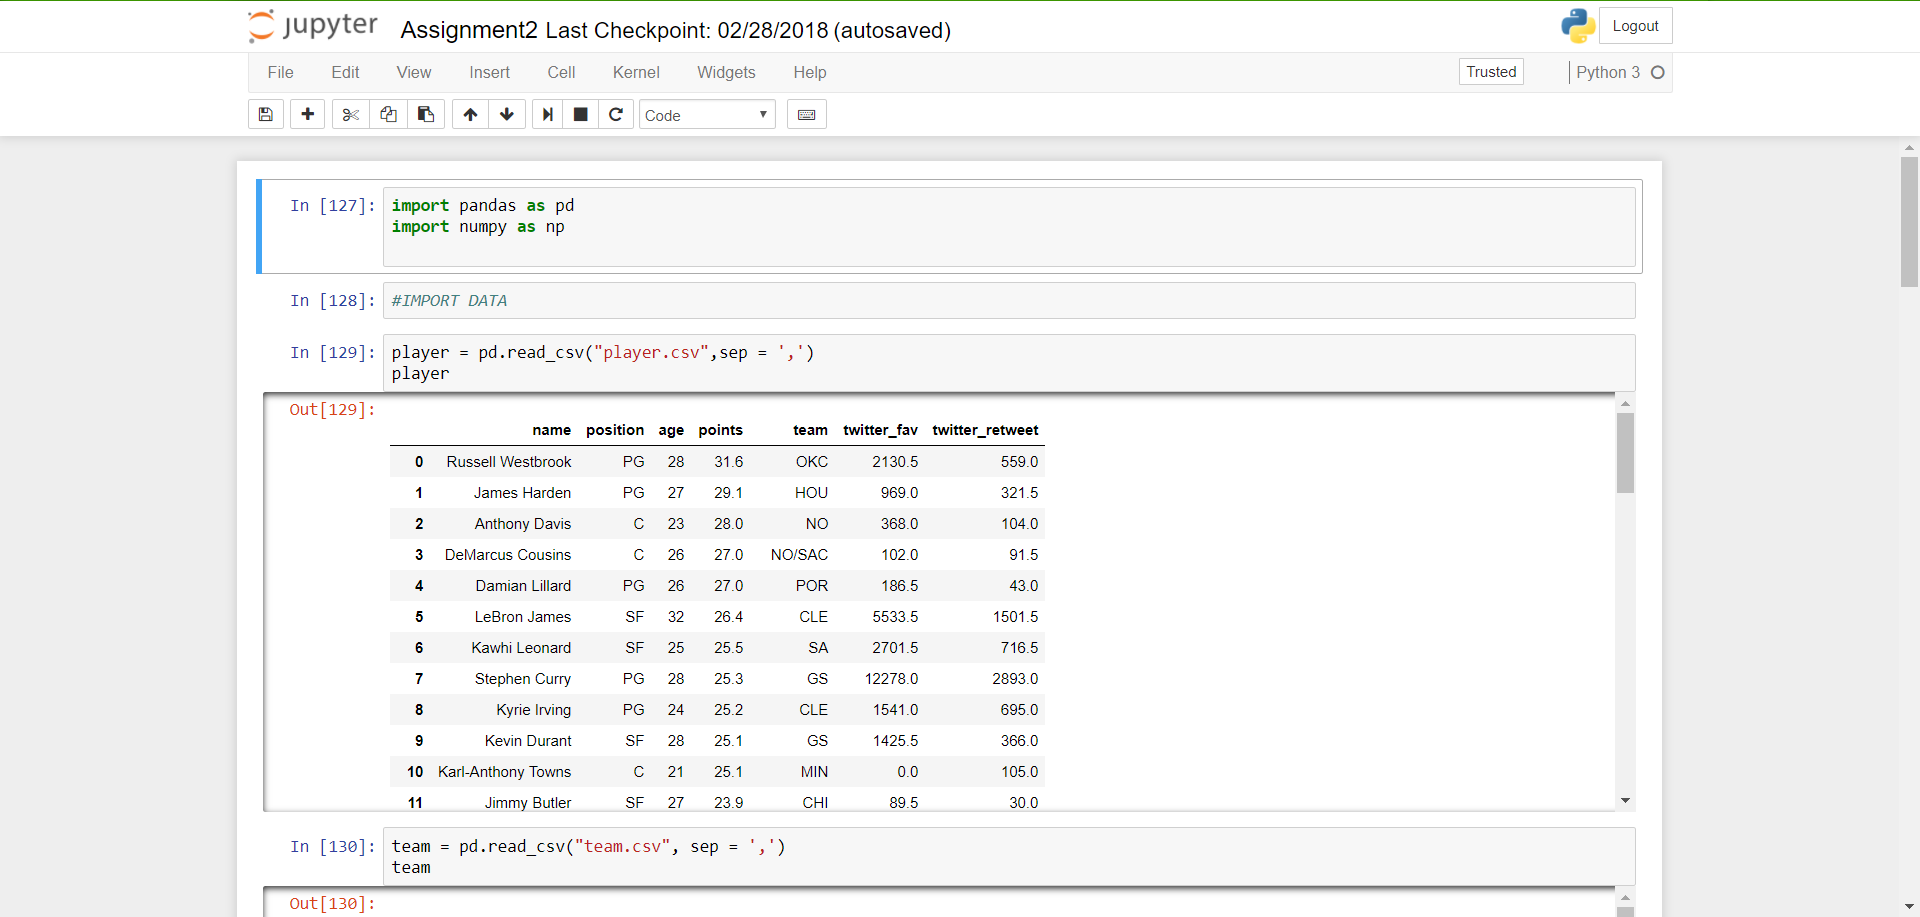
<br>

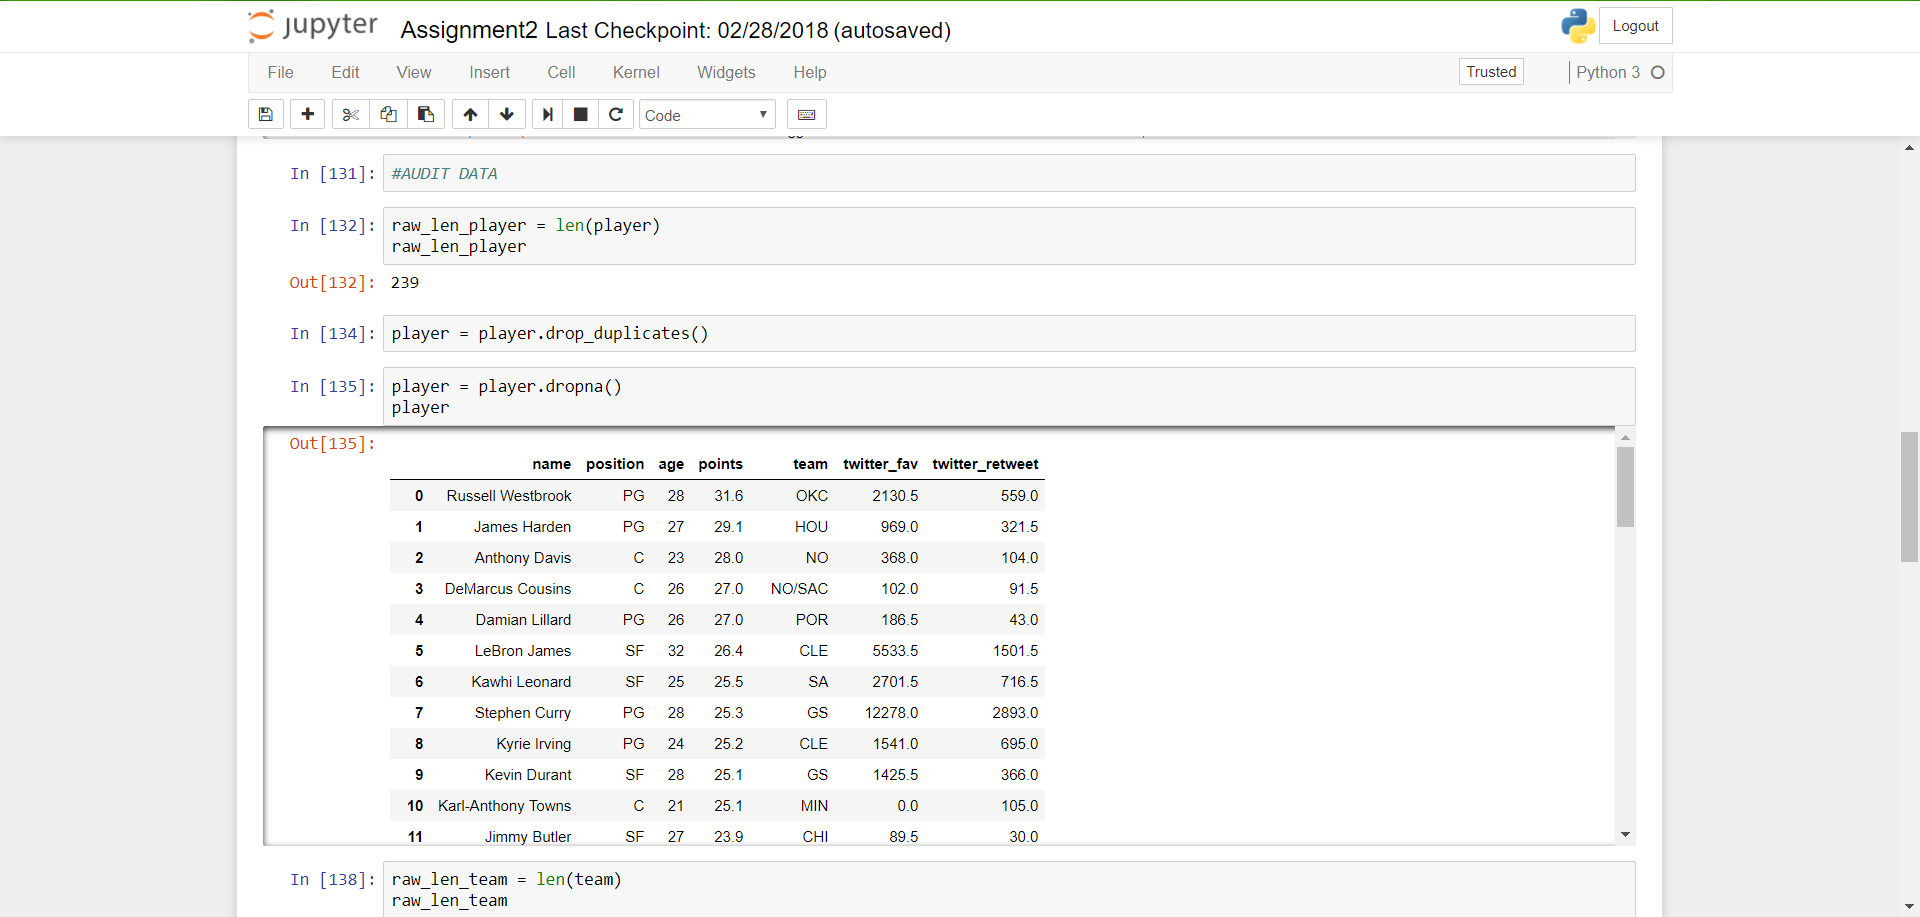
<br>

<h2>Import Data</h2>
<h3>Create Schema</h3>

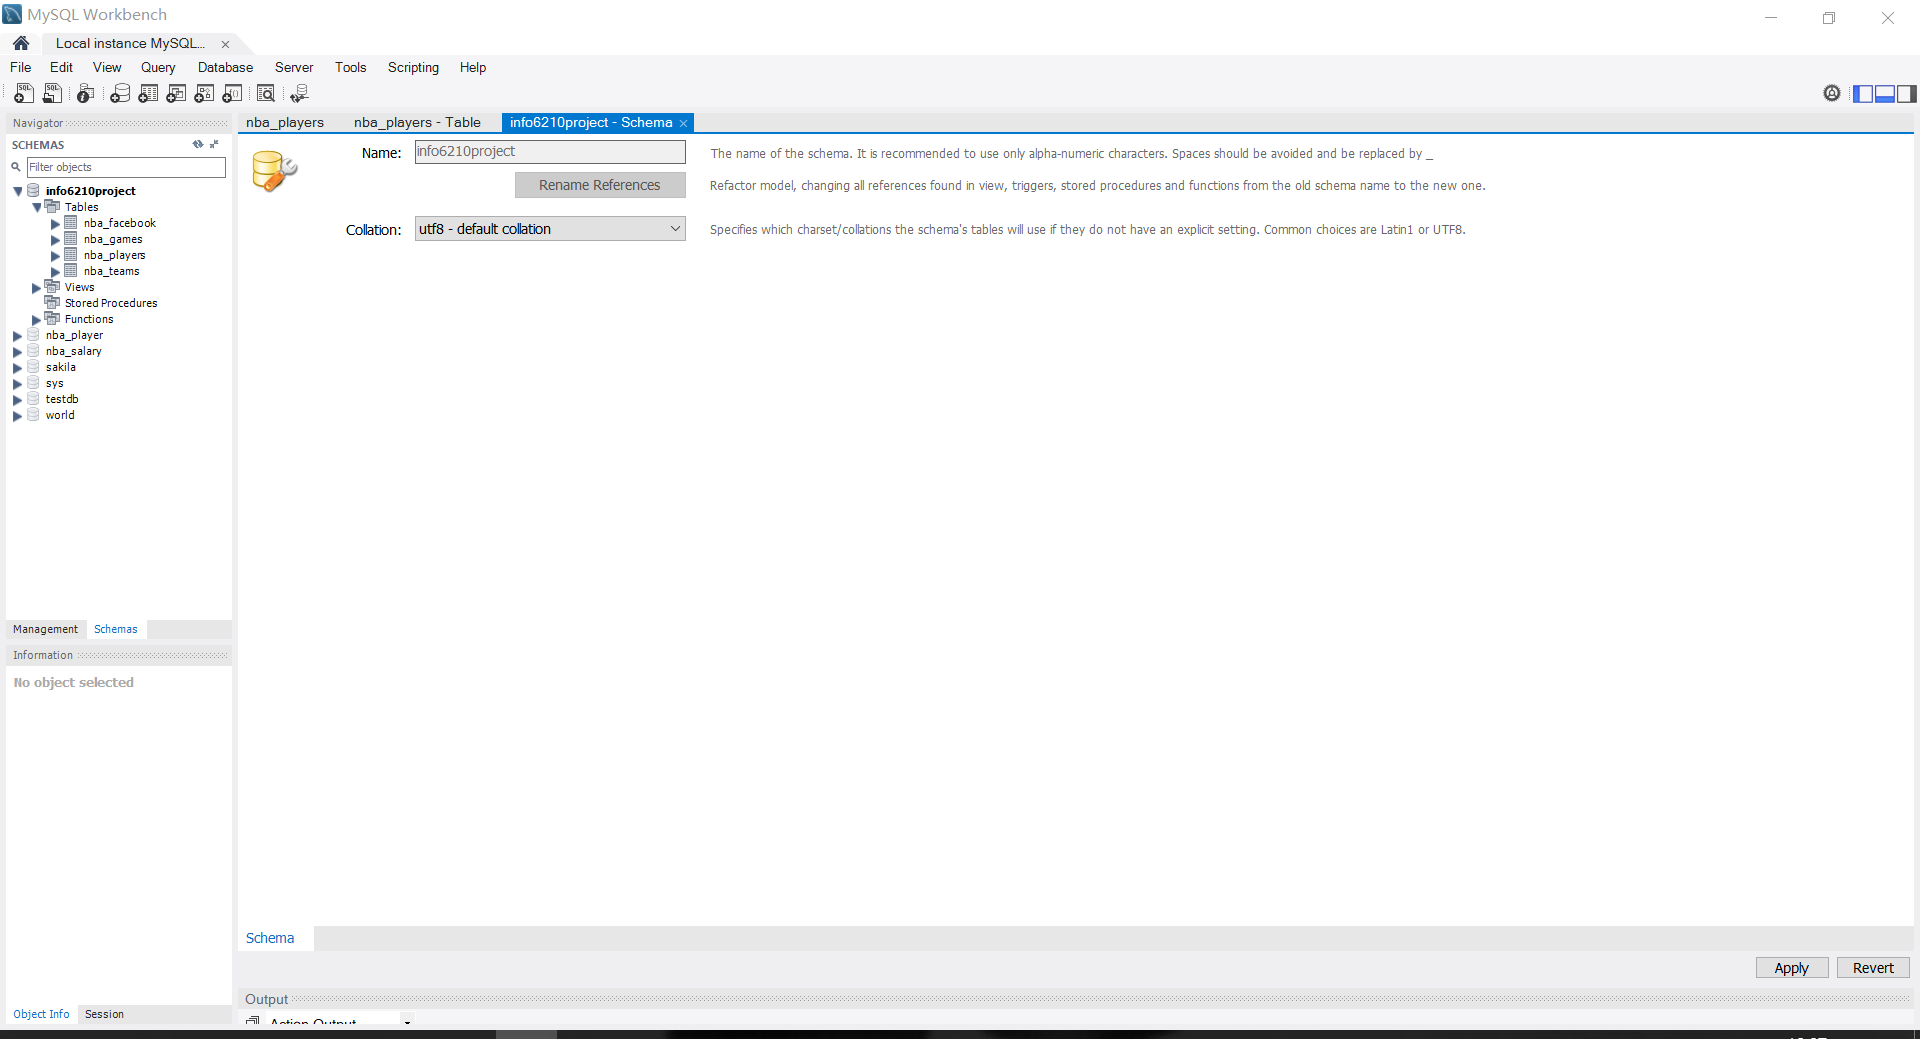
<h3>Create Table</h3>
We create our schema following first normal form for each entity. For example, here is our schema of nba_players table. 

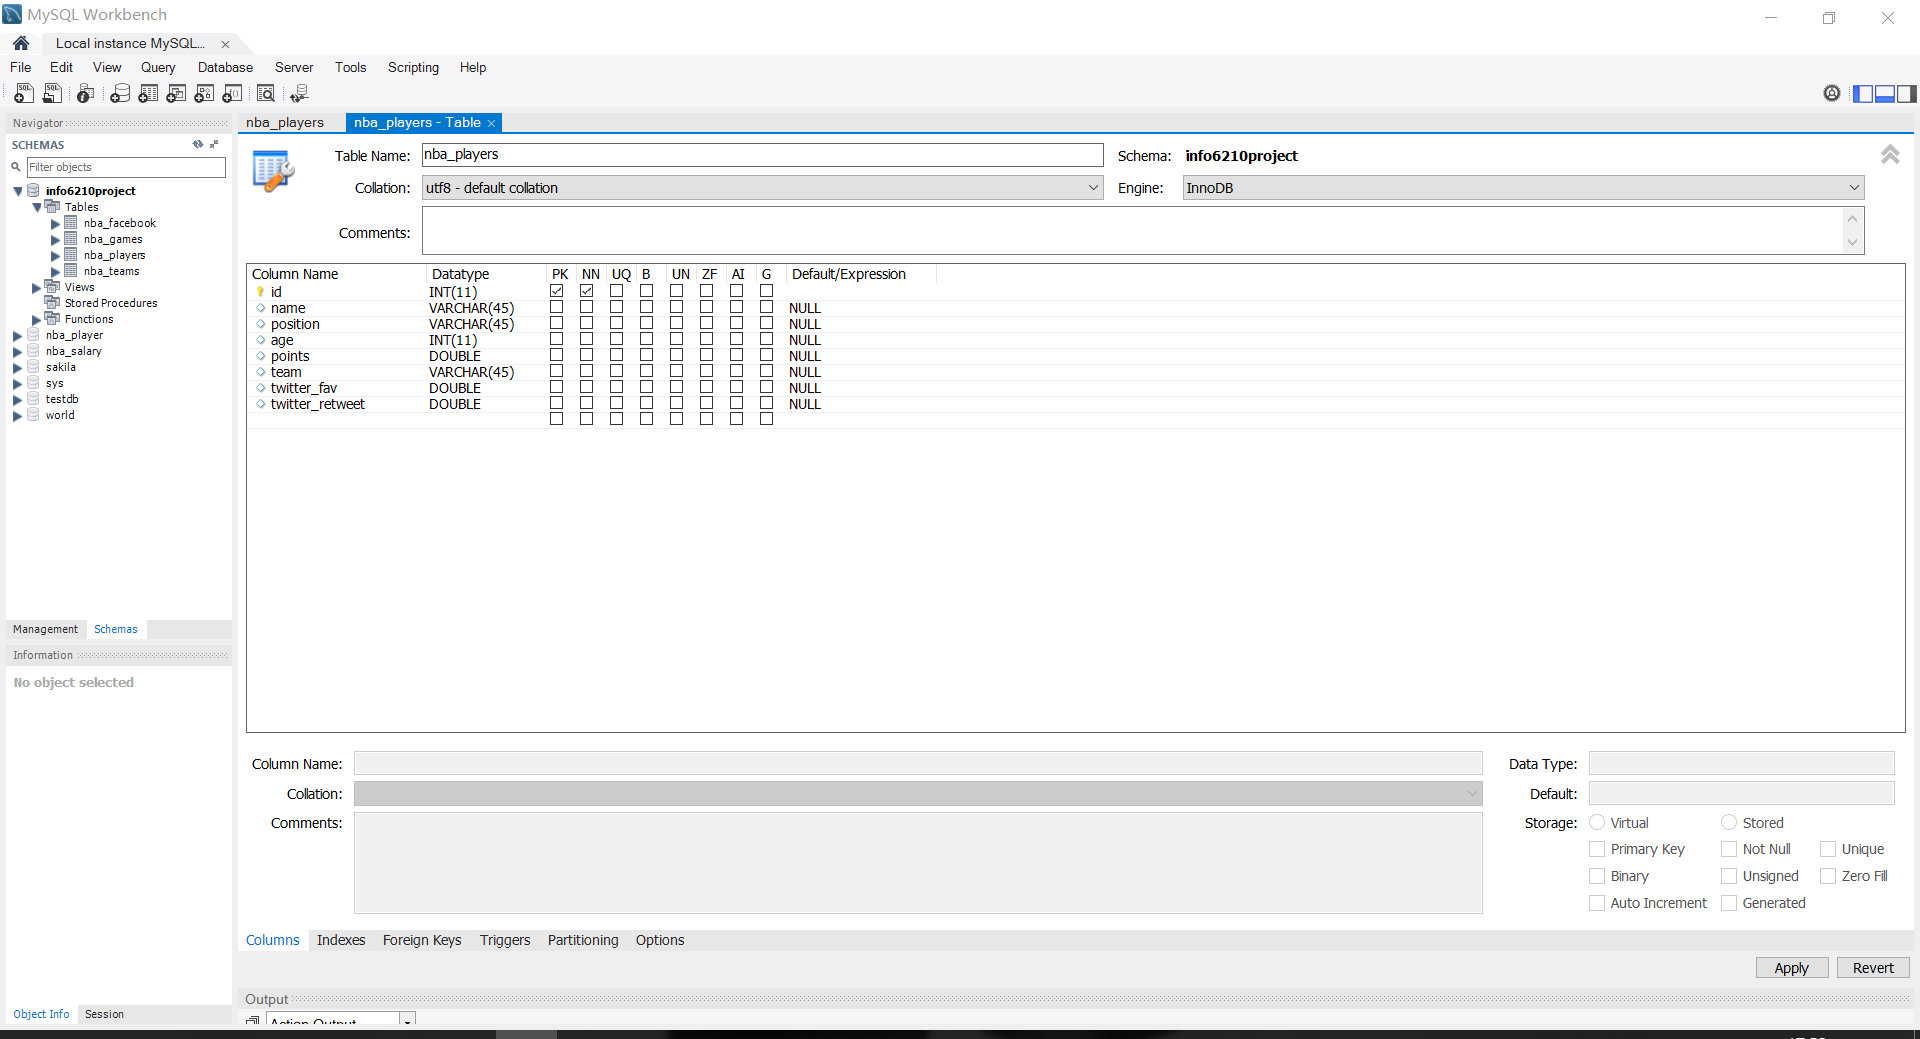

<h3>Import Data</h3>

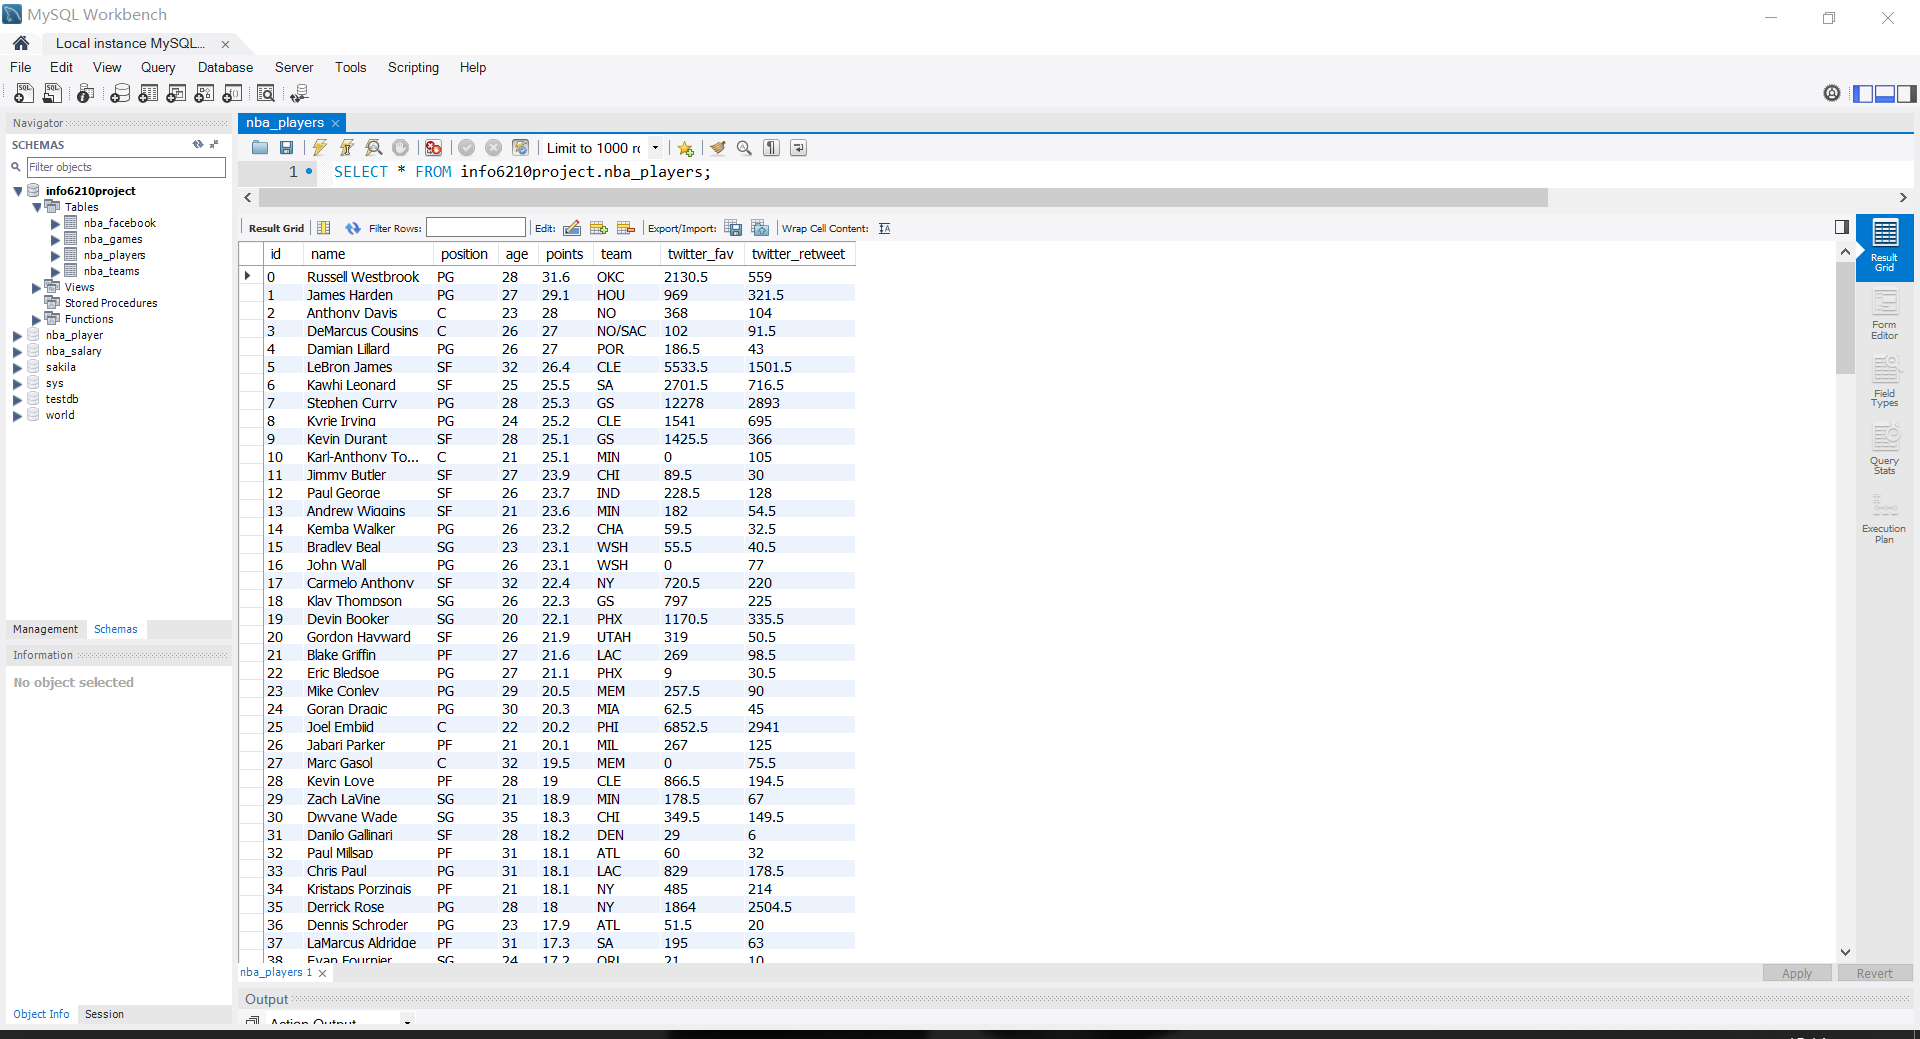

# <font color=blue>#The License

## License

[![MIT](http://nikbearbrown.com/YouTube/MachineLearning/IMG/MIT-license-sm.png)](https://opensource.org/licenses/MIT)

The MIT License (MIT)
=====================

Permission is hereby granted, free of charge, to any person
obtaining a copy of this software and associated documentation
files (the “Software”), to deal in the Software without
restriction, including without limitation the rights to use,
copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the
Software is furnished to do so, subject to the following
conditions:

The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT
HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY,
WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR
OTHER DEALINGS IN THE SOFTWARE.